<a href="https://colab.research.google.com/github/vinigoia/MODELO-PARA-PREVISAO-DE-CUSTOS-DE-SEGURO-DE-SAUDE/blob/main/MODELO_PARA_PREVIS%C3%83O_DE_CUSTOS_DE_SEGURO_DE_SA%C3%9ADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO PARA PREVISÃO DE CUSTOS DE SEGURO DE SAÚDE**

_______________________________________________________________________________

## ***Se você está com pressa!!!***
________________________________________________________________________________

O principal objetivo deste estudo é testar a ferramenta Pycaret para um fluxo de trabalho. Nele, você encontrará uma análise de exploração de dados de um dataset e o *workflow* da ferramenta, com conclusões sobre a praticidade do uso de auto machine learning para um problema de regressão linear.

## ***Contextualizando...***

_______________________________________________________________________________

Resumidamente, auto machine learning é uma técnica auxiliada por ferramentas que tem o intuito de otimizar a preparação dos dados para aplicação de machine learning, além de conseguir realizar de forma automática validações cruzadas de diversos algoritmos. Dessa maneira, o cientista de dados centraliza seus esforços nas análises exploratórias e na escolha de parâmetros para melhor desempenho.
_______________________________________________________________________________

<p align=center>
<img src="https://img.freepik.com/vetores-gratis/conceito-de-negocio-isometrica-do-homem-a-pensar-sistema-de-crm-inteligencia-artificial-robo-ai_39422-771.jpg?w=1060&t=st=1675887365~exp=1675887965~hmac=57f0804dbb035e23134392b15f5173af6808df9ea932db6cb8c0a8ad9a318834" width="60%"></p>

_______________________________________________________________________________
A ferramenta que utilizaremos aqui é o Pycaret, que segundo o próprio site, é uma biblioteca simples, fácil de aprender e *low code*. Basicamente é dividida em 4 módulos: Machine Learning Supervisionado, Machine Learning Não Supervisionado, Séries Temporais (Beta) e Datasets.

Para esse estudo, utilizaremos o Pycaret para a previsão de custos de seguro de saúde, ou seja, um problema de Regressão.

Prevendo esses valores, tem-se um range maior para planejamento de *budgets* e recursos, critérios essenciais para empresas que atuam nesse setor.

Iniciaremos nossos estudos importando as bibliotecas necessárias e salvando o *dataset em uma variável. Também veremos as primeiras entradas da tabela.

Os dados podem ser encontrados nesse [link](https://raw.githubusercontent.com/vinigoia/MODELO-PARA-PREVISAO-DE-CUSTOS-DE-SEGURO-DE-SAUDE/main/insurance.csv").

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Salvando o dataset em uma variável
df = pd.read_csv("https://raw.githubusercontent.com/vinigoia/MODELO-PARA-PREVISAO-DE-CUSTOS-DE-SEGURO-DE-SAUDE/main/insurance.csv")

In [ ]:
# Visualização das primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ***Sobre os Dados***
______________________________________________________________________________

Os dados utilizados neste projeto foram originalmente disponibilizados no [Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction). Nenhuma outra informação é encontrada, então não sabemos se a tabela condiz com a realidade. Porém, para nossos testes, será de boa utilidade.

### **Dicionário de Variáveis**
______________________________________________________

Sendo assim, as variáveis disponíveis são:

* `age` : idade;

* `sex` : gênero do cliente;

* `bmi` : índice de massa corpórea;

* `children` : quantidade de filhos;

* `smoker` : fumante;

* `region` : região da moradia;

* `charges` : valor do seguro.

## ***Análise Exploratória***
______________________________________________________



### **O primeiro contato**
______________________________________________________

Antes de começar qualquer análise, iremos utilizar alguns métodos para verificação de informações básicas do *dataset*, como valores médios, valores ausentes, e os tipos de variáveis presentes.

In [ ]:
# Descrição geral do dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


A princípio, percebe-se que os dados estão equilibrados. Vamos verificar o tipo de variável presente em cada atributo, bem como a presença de valores ausentes.

In [ ]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Nesse comando, verificamos que o tamanho do *dataset* é de 1338 linhas e 7 colunas. Também notamos que não há valores ausentes e que as variáveis variam entre numéricas e categóricas.

Para ter certeza dessa informação, vamos executar o camndo abaixo.

In [ ]:
# Verificação de valores únicos por coluna
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Notamos que os atributos 'sex', 'smoker' e 'region', por serem *strings* e possuirem uma baixa variação, provavelmente possuem características categóricas. Teremos que tratá-los futuramente.

Agora, plotaremos alguns gráficos e veremos se os dados nos dão algum insght.

Plotaremos, primeiramente, histogramas das colunas e depois gráficos de dispersão para verificação das relações dos atributos.

In [ ]:
# Importação de biblioteca necessária
import seaborn as sns

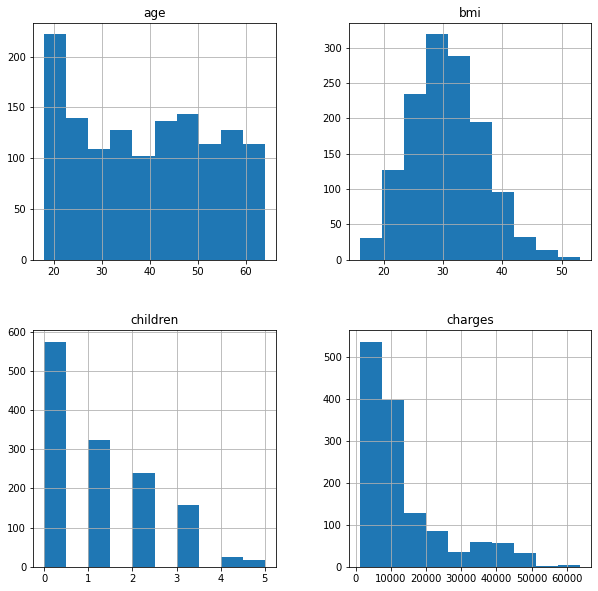

In [ ]:
# Plotagem de histograma
df.hist(figsize=(10,10))

plt.show()

Alguns insights que podemos ter com esses gráficos são: 
* Há um número maior de pessoas jovens (20 anos) que contratam seguro de saúde;
* Pessoas classificadas como obesas pelo índice de massa corporal tendem a adquirir seguros de saúde;
* Pessoas sem filhos são mais propensas a possuirem seguro de saúde;
* Há um número maior de seguro de saúde barato com relação aos maiores valores.

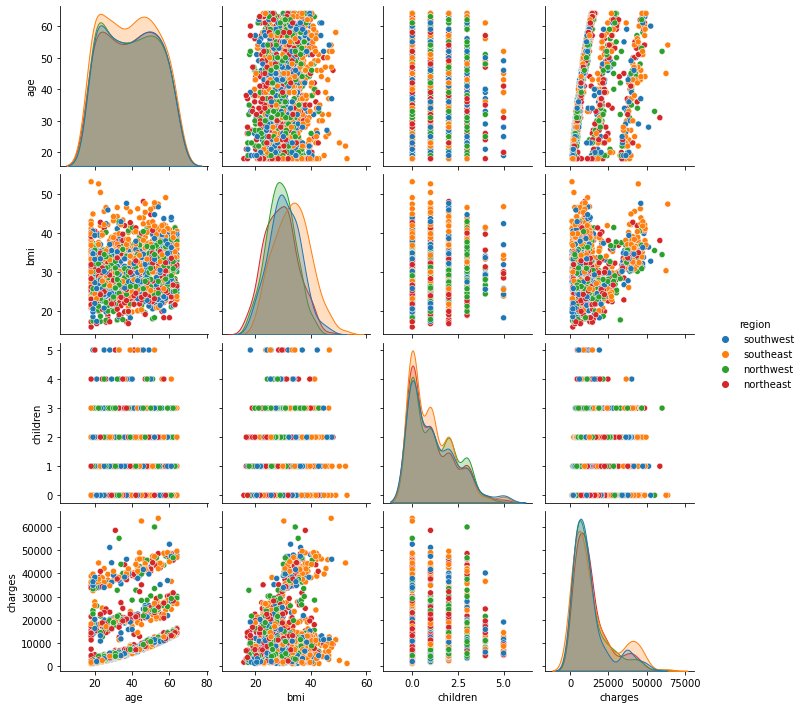

In [ ]:
# Plotagem de graficos de dispersão segmentados por região
sns.pairplot(data=df, hue='region')

Verificamos certa tendência na relação das variáveis 'age' e 'charge', ou seja, quanto maior a idade, maior o preço do seguro de saúde. Porém também observamos grupos de valores.

Através do código abaixo, verificamos uma relação maior nos atributos comentados acima.

In [ ]:
# Correlação de atributos em ordem crescente
df.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64


Quanto a região, parecem equilibradas. Vamos verificar essa informação com outra plotagem.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


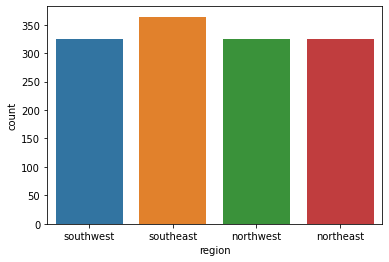

In [ ]:
# Plotagem de gráfico de barra das regiões
sns.countplot(df.region)

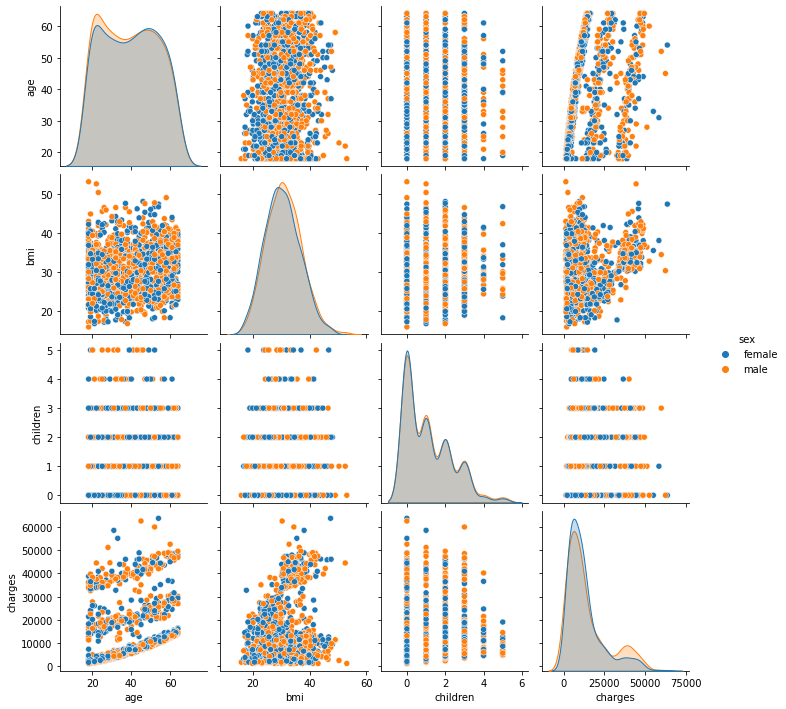

In [ ]:
# Plotagem de graficos de dispersão segmentados por gênero
sns.pairplot(data=df, hue='sex')

São os mesmos gráficos gerados anteriormente, porém segmentados pelo gênero. A primeira impressão que temos é que a cor laranja se destaca. Vamos verificar se há um número maior de homens em nosso *dataset*.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


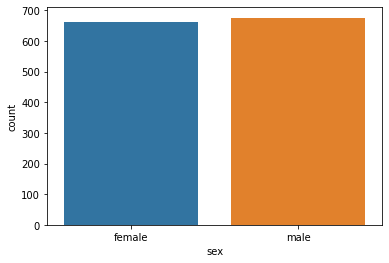

In [ ]:
# Plotagem de gráfico de barra dos gêneros
sns.countplot(df.sex)

Nosso *dataset* está bem equilibrado.

Selecionaremos a seguir os menores valores de seguro de saúde em ordem crescente e os maiores valores em ordem decrescente.

In [ ]:
# Seleção dos menores valores de 'charges' em ordem crescente
df.iloc[df.charges.sort_values()[:10].index]

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


Nesses 10 itens selecionados observamos que os menores valores contratados são para homens jovens, onde a maioria é obesa, sem filhos e não fumantes, moradores da região sudeste. Claro que não podemos generalizar para todo o *dataset*, mas é um pequeno indício.

In [ ]:
# Seleção dos maiores valores de 'charges' em ordem decrescente
df.iloc[df.charges.sort_values(ascending=False)[:10].index]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


Nesses 10 itens selecionados observamos que os maiores valores contratados são para homens mais velhos em sua maioria, obesos, com filhos em sua maioria e fumantes, moradores da região sudeste em sua maioria. 

A última plotagem que faremos será para verificação de *outliers* em nosso *dataset*. Tal análise é de extrema importância para definirmos as estratégias de tratamento desses dados.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

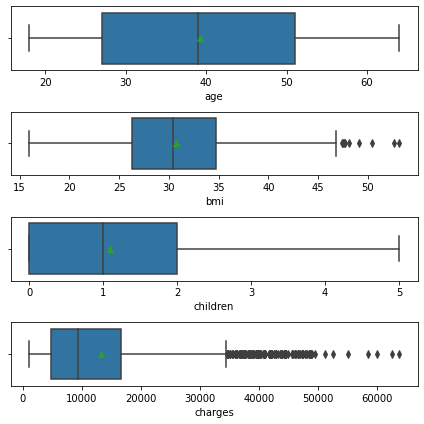

In [ ]:
# Configuração para plotagem
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(6,6))

# Plotagem de boxplots
sns.boxplot(df.age,ax=ax[0],showmeans=True)
sns.boxplot(df.bmi,ax=ax[1], showmeans=True)
sns.boxplot(df.children,ax=ax[2], showmeans=True)
sns.boxplot(df.charges,ax=ax[3], showmeans=True)

plt.tight_layout()
plt.show()

É clara a presença de *outliers* nos atributos 'bmi' e 'charges'. Vamos tratá-los futuramente.

## ***Preparando o Terreno***
________________________________________________________________________________

Nesta etapa, realizaremos uma cópia de nosso *dataset* original e separaremos 20% das entradas para teste. Os outros 80% serão utilizados para treino diretamente no Pycaret.

In [ ]:
# Cópia do dataset original
df_wk = df.copy()

print("O dataset possui {} linhas e {} colunas".format(df_wk.shape[0],df_wk.shape[1]))

O dataset possui 1338 linhas e 7 colunas


In [ ]:
# Definição do dataset de teste
df_teste = df_wk.sample(frac=0.2, random_state=0)

print("O dataset de teste possui {} linhas e {} colunas".format(df_teste.shape[0],df_teste.shape[1]))

O dataset de teste possui 268 linhas e 7 colunas


In [ ]:
# Definição do dataset de treino
df_treino = df_wk.drop(df_teste.index)

print("O dataset de treino possui {} linhas e {} colunas".format(df_treino.shape[0],df_treino.shape[1]))

O dataset de treino possui 1070 linhas e 7 colunas


In [ ]:
# Reset dos índices de ambos os datasets
df_teste.reset_index(inplace=True)
df_treino.reset_index(inplace=True)

## ***Utilizando o Pycaret***
________________________________________________________________________________

O Pycaret é uma biblioteca que necessita de instalação. Portanto, com os comandos abaixo, iremos instalar a bilioteca e importar os componentes necessários para a execução no Collab.

In [ ]:
# Instalação da biblioteca
!pip install pycaret -q

In [ ]:
# Importação de utilitário para funcionamento no Collab
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab()>

In [ ]:
# Importação de todos os módulos
from pycaret.regression import *

Pycaret necessita de uma triagem inicial, onde informamos nosso *dataset* de treino e nosso atributo alvo. A partir dessa primeira análise, ele nos retorna uma tabela de parâmetros que podem ser modificados de acordo com as necessidades de tratamento.

In [ ]:
# Setup inicial do Pycaret
reg = setup (data = df_treino, target = 'charges')

,Description,Value
0,session_id,4293
1,Target,charges
2,Original Data,"(1070, 8)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(748, 15)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

Após analisarmos a tabela, modificaremos dois parâmetros necessários a nossa análise: Trasnformation, referente a utilização da Padronização dos valores, e Remove Outliers, referente a remoção dos valores extrapolados.

In [ ]:
# Setup com parâmetros adicionais
reg = setup (data = df_treino, target = 'charges', transformation = True, remove_outliers=True )

,Description,Value
0,session_id,1990
1,Target,charges
2,Original Data,"(1070, 8)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(710, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('rem_outliers',
                 Outlier(contamination=0.05, methods=['pca'], random_state=1990,
                         target='charges')),
                ('cluster_all', 'passthrough'),
     

Com os dados carregados e os parâmetros definidos, podemos utilizar o método que executa todos os algoritmos de machine learning disponíveis na ferramenta e nos retorna uma tabela com valores de diferentes métricas, ordenados por ordem decrescente a partir da métrica R2 e utilizando 10 folds de validação cruzada como padrão.

In [ ]:
# Comparação da performance dos algoritmos
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2698.7801,2.405372e+07,4885.8075,0.8112,0.4635,0.3243,0.152
rf,Random Forest Regressor,2901.2813,2.578600e+07,5052.7206,0.7976,0.4924,0.3626,0.303
lightgbm,Light Gradient Boosting Machine,3079.8703,2.716815e+07,5168.2629,0.7865,0.5943,0.3956,0.227
ada,AdaBoost Regressor,4230.3632,2.920118e+07,5398.3135,0.7741,0.6382,0.7405,0.031
et,Extra Trees Regressor,3015.0354,2.910844e+07,5359.0595,0.7720,0.5067,0.3697,0.251
llar,Lasso Least Angle Regression,4181.9908,3.850182e+07,6194.2080,0.7054,0.6066,0.4233,0.026
ridge,Ridge Regression,4204.4869,3.857658e+07,6200.7888,0.7048,0.5686,0.4267,0.021
lasso,Lasso Regression,4186.9580,3.856320e+07,6199.6380,0.7047,0.5691,0.4235,0.024
br,Bayesian Ridge,4199.5349,3.857449e+07,6200.6132,0.7047,0.5670,0.4257,0.022
lr,Linear Regression,4186.9355,3.856901e+07,6200.1469,0.7046,0.5703,0.4234,0.526


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1990, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


Como mostrado na tabela, os três melhores modelos que performaram com um número maior na métrica R2 foram: *Gradient Boosting Regressor*, *Random Forest Regressor* e *Light Gradient Boosting Machine*. Podemos printar o melhor modelo e os parâmetros utilizados.

In [ ]:
# Parâmetros do melhor modelo
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1990, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Apesar de verificarmos os melhores modelos com o método acima, ele não nos retorna modelos treinados. É apenas um ponto de partida para a escolha do melhor modelo. Desta maneira, utilizaremos os comandos abaixo para instanciar os nossos três melhores modelos.

In [ ]:
# Instanciamento do Gradient Boosting Regressor
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2939.0395,2.778861e+07,5271.4905,0.7957,0.4934,0.3011
1,2975.4580,3.135283e+07,5599.3600,0.7783,0.4902,0.2968
2,2538.6708,2.000206e+07,4472.3668,0.9018,0.4229,0.3593
3,3169.2938,2.512839e+07,5012.8221,0.8142,0.4609,0.3587
4,2271.9379,1.710108e+07,4135.3458,0.8693,0.4182,0.2957
5,2607.8123,2.682209e+07,5179.0045,0.6392,0.5070,0.3147
6,2855.5357,2.471702e+07,4971.6219,0.7849,0.5575,0.3571
7,2762.5339,2.240125e+07,4732.9961,0.8751,0.4651,0.3573
8,2192.9837,1.919584e+07,4381.3055,0.8453,0.4356,0.2649


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1990, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Instanciamento do Random Forest Regressor
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3281.9190,2.998599e+07,5475.9466,0.7796,0.5193,0.3438
1,3314.1550,3.293881e+07,5739.2340,0.7671,0.5098,0.3067
2,2997.3983,2.628144e+07,5126.5429,0.8710,0.5710,0.5525
3,3276.0904,2.686168e+07,5182.8257,0.8014,0.5023,0.4025
4,2253.2629,1.522900e+07,3902.4348,0.8836,0.4237,0.3367
5,2917.0726,3.140203e+07,5603.7517,0.5776,0.5334,0.3025
6,2857.8149,2.478978e+07,4978.9337,0.7843,0.5615,0.3782
7,2871.0675,2.469510e+07,4969.4164,0.8623,0.4486,0.3387
8,2524.7686,2.078014e+07,4558.5235,0.8325,0.4712,0.3275


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Instanciamento do Light Gradient Boosting Machine
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3508.4777,3.219943e+07,5674.4546,0.7633,0.7487,0.3730
1,3752.2508,4.253422e+07,6521.8263,0.6992,0.6522,0.3585
2,3349.6933,2.494056e+07,4994.0522,0.8776,0.5836,0.5557
3,3239.9395,2.646713e+07,5144.6218,0.8043,0.5131,0.3538
4,2245.3827,1.468572e+07,3832.1954,0.8877,0.4708,0.3559
5,3056.7931,3.201344e+07,5658.0420,0.5693,0.5675,0.3552
6,3147.2687,2.744705e+07,5238.9933,0.7612,0.6966,0.3886
7,3003.6873,2.401535e+07,4900.5462,0.8661,0.5374,0.3956
8,2612.8651,2.094178e+07,4576.2191,0.8312,0.5602,0.3911


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1990, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


O Pycaret nos dá a liberdade de testar quantos algoritmos quisermos sem um total aprofundamento, desde que ele esteja presente em sua biblioteca. 

Instanciado os modelos, iremos realizar o *tuning* de parâmetros para podermos obter os melhores valores para R2.

In [ ]:
# Tuning de parâmetros do Gradient Boosting Regressor
gbr_tuned = tune_model(gbr, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2948.1889,2.729109e+07,5224.0879,0.7994,0.4940,0.3074
1,3012.1206,3.085791e+07,5554.9894,0.7818,0.4793,0.2992
2,2648.2489,2.224979e+07,4716.9686,0.8908,0.4258,0.3529
3,3201.0740,2.454845e+07,4954.6389,0.8185,0.4434,0.3413
4,2304.5871,1.626681e+07,4033.2134,0.8756,0.3920,0.2610
5,2622.8245,2.675461e+07,5172.4860,0.6401,0.5156,0.3235
6,2828.6001,2.453081e+07,4952.8586,0.7865,0.5465,0.3257
7,2714.4531,2.159497e+07,4647.0393,0.8796,0.4160,0.2951
8,2521.4321,1.963046e+07,4430.6277,0.8418,0.5054,0.3719


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1990, subsample=0.95, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# Tuning de parâmetros do Random Forest Regressor
rf_tuned = tune_model(rf, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2426.6345,2.853940e+07,5342.2276,0.7902,0.4788,0.1579
1,2456.5401,3.075785e+07,5545.9763,0.7825,0.4332,0.1347
2,1643.0373,1.882912e+07,4339.2536,0.9076,0.2748,0.1126
3,2233.8787,2.470533e+07,4970.4452,0.8174,0.3707,0.1466
4,1352.1017,1.221569e+07,3495.0949,0.9066,0.3058,0.0947
5,1722.0440,2.627010e+07,5125.4368,0.6466,0.4636,0.1222
6,2195.6937,2.431870e+07,4931.3990,0.7884,0.5094,0.1625
7,2119.2000,2.513344e+07,5013.3265,0.8599,0.3562,0.1427
8,1425.3741,1.714156e+07,4140.2366,0.8618,0.4161,0.1071


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# Tuning de parâmetros do Light Gradient Boosting Machine
lightgbm_tuned = tune_model(lightgbm, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3013.1476,2.504443e+07,5004.4406,0.8159,0.4669,0.3596
1,3404.8218,3.633666e+07,6027.9900,0.7431,0.5023,0.3843
2,3093.0098,2.558169e+07,5057.8349,0.8744,0.4975,0.4713
3,3193.0503,2.510045e+07,5010.0353,0.8144,0.4588,0.3669
4,2301.4496,1.428138e+07,3779.0719,0.8908,0.4523,0.3639
5,2760.7316,2.692488e+07,5188.9189,0.6378,0.4987,0.3365
6,2774.6390,2.265888e+07,4760.1348,0.8028,0.5054,0.3378
7,2919.0135,2.456230e+07,4956.0364,0.8631,0.4190,0.3194
8,2436.2949,1.787492e+07,4227.8736,0.8559,0.4869,0.3861


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:LGBMRegressor(bagging_fraction=0.5, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=30, n_jobs=-1, num_leaves=4, objective=None,
              random_state=1990, reg_alpha=0.4, reg_lambda=0.3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


Observamos que, para todos os modelos, o *tuning* de parâmetros aumentou a performance se comparado ao primeiro instanciamento. 

Sendo assim, o modelo com melhor performance que utilizaremos será o *Random Forest Regressor*. Abaixo, os melhores parâmetros utilizados.



In [ ]:
# Parâmetros definidos após o tuning 
print(rf_tuned)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False)


Com o modelo escolhido, podemos plotar vários gráficos e analisá-los de forma mais profunda.

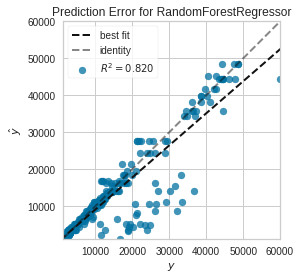

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Gráfico de erro
plot_model(rf_tuned, plot='error')

Neste gráfico, podemos verificar a linha de regressão criada pelo pelo modelo, bem como as previsões e desvios.

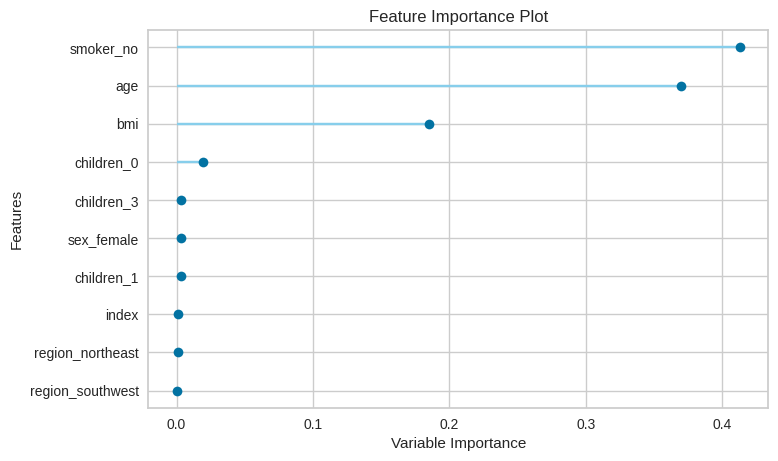

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Gráfico de importância de atributo
plot_model(rf_tuned, plot='feature')

Segundo o modelo, os atributos mais importantes para as previsões foram o 'smoker_no', 'age' e 'bmi'. 

In [ ]:
# Opções de gráficos
evaluate_model(rf_tuned)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Na tabela acima podemos ver a evolução dos pontos de treinameto juntamente com a validação cruzada. Podemos verificar outros gráficos também nas abas após a execução dos comandos.

Com o comando abaixo, podemos realizar as predições pelo conjunto de dados de treino e verificar a performance final. Neste caso, o R2 ficou em torno de 0,82. Na tabela, também é criado uma nova coluna chamada 'Label' com os valores das predições.

In [ ]:
# Predições
predict_model(rf_tuned)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2191.9159,2.566575e+07,5066.1376,0.82,0.4127,0.1456


,index,age,bmi,sex_female,children_0,children_1,children_2,children_3,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.990722,-1.198190,-2.400473,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2775.192139,3577.999023
1,1.511293,0.388503,0.595117,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7147.472656,7570.771729
2,-0.543499,-0.950928,-0.161588,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2897.323486,2494.021973
3,0.239632,-0.108159,1.183139,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40419.019531,45158.082031
4,-0.180160,-0.634030,1.824659,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4753.636719,5031.269531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.611856,0.319093,0.789856,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7345.726562,7570.771729
318,0.194809,0.861811,0.939061,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,10848.134766,10264.442383
319,-0.769454,-0.255109,0.007071,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4751.069824,5172.244629
320,-0.757586,0.728702,0.051506,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9778.347656,9728.297363


Podemos observar também pela tabela acima a eficácia dos métodos que foram instanciados no setup para a transformação dos dados. Podemos reparar nos valores padronizados e a utilização do One Hot Encoding para as variáveis categóricas.

O procedimento do Pycaret nos orienta a finalizar o processo através de um método para depois aplicar o modelo nos dados de teste.

In [ ]:
# Finalização do procedimento
final_rf = finalize_model(rf_tuned)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
             

Procedimento finalizado, podemos novamente realizar as previsões nos dados de treino. Verificamos assim um aumento para 0,8425 da métrica R2. Podemos printar também os parâmetros finais utilizados.

In [ ]:
# Predições de treino finais
predict_model(final_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1789.5885,2.246733e+07,4739.9719,0.8425,0.3874,0.115


,index,age,bmi,sex_female,children_0,children_1,children_2,children_3,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.990722,-1.198190,-2.400473,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2775.192139,2709.177856
1,1.511293,0.388503,0.595117,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7147.472656,7420.336182
2,-0.543499,-0.950928,-0.161588,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2897.323486,2497.038330
3,0.239632,-0.108159,1.183139,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40419.019531,42851.289062
4,-0.180160,-0.634030,1.824659,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4753.636719,4934.705078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.611856,0.319093,0.789856,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7345.726562,7420.336182
318,0.194809,0.861811,0.939061,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,10848.134766,11073.738770
319,-0.769454,-0.255109,0.007071,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4751.069824,5245.227051
320,-0.757586,0.728702,0.051506,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9778.347656,9855.131836


In [ ]:
# Parâmetros finais utilizados
print(final_rf)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False)


Com o modelo pronto, iremos utilizá-lo nos dados de teste e verificar a performance.

In [ ]:
# Predições nos dados de teste
unseen_predictions = predict_model(final_rf, data=df_teste)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=1990, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1670.5114,1.731193e+07,4160.7606,0.8912,0.353,0.1239


,index,age,sex,bmi,children,smoker,region,charges,Label
0,578,52,male,30.200,1,no,southwest,9724.53000,10688.523438
1,610,47,female,29.370,1,no,southeast,8547.69130,8428.069336
2,569,48,male,40.565,2,yes,northwest,45702.02235,44202.652344
3,1034,61,male,38.380,0,no,northwest,12950.07120,13429.035156
4,198,51,female,18.050,0,no,northwest,9644.25250,9541.695312


Podemos notar que o modelo teve uma ótima performance nos novos dados inseridos, com 0,8912 na métrica R2.

## ***Conclusão***
________________________________________________________________________________

Percebe-se que a ferramenta Pycaret nos auxilia e muito na preparação dos dados e nos testes de algoritmo. Com poucos comandos, é possível verificar várias métricas de diversos modelos e utilizar as melhores combinações para a criação de um modelo performático. Apesar de toda essa praticidade, é de extrema importância o conhecimento de todo o processo por parte do cientista de dados, uma vez que os algoritmos podem fazer certas considerações que não fazem sentido dentro da linha de raciocínio.

Com essa otimização de tempo, a análise exploratória dos dados pode ser realizada de maneira mais detalhada, com geração de insghts que extrapolam o âmbito da previsão de resultados por métodos de regressão linear.